<a href="https://colab.research.google.com/github/MochammadHAnshory/AutomateReport/blob/main/Automate_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mengimport Data

In [ ]:
from google.colab import files
files1 = files.upload()

#Membaca File yang di Upload dan Import Library

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
df1 = pd.read_csv('/content/Sales_January_2019.csv')
df2 = pd.read_csv('/content/Sales_February_2019.csv')
df3 = pd.read_csv('/content/Sales_March_2019.csv')
df4 = pd.read_csv('/content/Sales_April_2019.csv')
df5 = pd.read_csv('/content/Sales_May_2019.csv')
df6 = pd.read_csv('/content/Sales_June_2019.csv')
df7 = pd.read_csv('/content/Sales_July_2019.csv')
df8 = pd.read_csv('/content/Sales_August_2019.csv')
df9 = pd.read_csv('/content/Sales_September_2019.csv')
df10 = pd.read_csv('/content/Sales_October_2019.csv')
df11 = pd.read_csv('/content/Sales_November_2019.csv')
df12 = pd.read_csv('/content/Sales_December_2019.csv')

#Meyatukan Data

In [17]:
combined_file_2019 = pd.concat([df1,df2,df3,df4,df5,df6,df6,df7,df8,df9,df10,df11,df12], ignore_index= True) 

In [ ]:
combined_file_2019

In [19]:
combined_file_2019.drop(combined_file_2019[combined_file_2019["Quantity Ordered"] == "Quantity Ordered"].index, inplace=True)

#Menambahkan Kolom Total Harga dan Tanggal Order

In [20]:
combined_file_2019["Total Harga"] = combined_file_2019["Quantity Ordered"].astype(float) * combined_file_2019["Price Each"].astype(float)

In [25]:
combined_file_2019["Waktu Order"] = pd.to_datetime(combined_file_2019["Order Date"])

In [26]:
combined_file_2019.drop(combined_file_2019[combined_file_2019["Order Date"].isna()].index, inplace=True)

In [ ]:
combined_file_2019

#Pengelompokkan berdasarkan Produk dan Bulan

In [29]:
bulan  = combined_file_2019.groupby(pd.Grouper(key='Waktu Order', freq='M')).agg({"Total Harga": "sum"}).reset_index()

In [ ]:
bulan

In [32]:
produk = combined_file_2019.groupby('Product').agg({"Total Harga": "sum"}).reset_index().sort_values('Total Harga', ascending=False).head(3)

In [39]:
produk

,Product,Total Harga
13,Macbook Pro Laptop,8642800.00
18,iPhone,5166700.00
14,ThinkPad Laptop,4444955.55


[Text(0, 0, '1813586.44'),
 Text(0, 0, '2202022.42'),
 Text(0, 0, '2807100.38'),
 Text(0, 0, '3390670.24')]

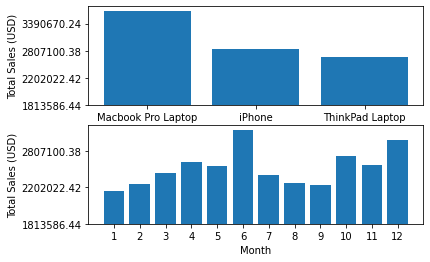

In [47]:
    fig, ax = plt.subplots(2)

    # Membuat grafik Sales by Produk
    ax[0].bar(produk['Product'], produk['Total Harga'])
    ax[0].set_xlabel('Product')
    ax[0].set_ylabel('Total Sales (USD)')
    ax[0].set_yticklabels(bulan['Total Harga'])

    # Membuat grafik Sales berdasarkan bulan
    ax[1].bar(bulan['Waktu Order'].dt.month.astype(str), bulan['Total Harga'])
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Total Sales (USD)')
    ax[1].set_yticklabels(bulan['Total Harga'])